In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
from itertools import product

# Define 7-segment LED segments (a, b, c, d, e, f, g)
segments = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

# Define the known 7-segment LED patterns for digits 0-9
digit_patterns = [
    [1, 1, 1, 1, 1, 1, 0, 1],  # Digit 0
    [0, 1, 1, 0, 0, 0, 0, 1],  # Digit 1
    [1, 1, 0, 1, 1, 0, 1, 1],  # Digit 2
    [1, 1, 1, 1, 0, 0, 1, 1],  # Digit 3
    [0, 1, 1, 0, 0, 1, 1, 1],  # Digit 4
    [1, 0, 1, 1, 0, 1, 1, 1],  # Digit 5
    [1, 0, 1, 1, 1, 1, 1, 1],  # Digit 6
    [1, 1, 1, 0, 0, 0, 0, 1],  # Digit 7
    [1, 1, 1, 1, 1, 1, 1, 1],  # Digit 8
    [1, 1, 1, 1, 0, 1, 1, 1]   # Digit 9
]

# Generate all possible combinations of 7-segment patterns (0 for off, 1 for on)
all_possible_patterns = list(product([0, 1], repeat=len(segments)))

# Create a list to store patterns and labels
patterns_with_labels = []

# Label each pattern based on whether it's in digit_patterns or not
for pattern in all_possible_patterns:
    if list(pattern) in digit_patterns:
        label = 1
    else:
        label = 0
    patterns_with_labels.append((pattern, label))

# Convert the patterns and labels to NumPy arrays
patterns = np.array([pattern for pattern, _ in patterns_with_labels])
labels = np.array([label for _, label in patterns_with_labels])

# Now, 'patterns' contains all possible 7-segment LED patterns, and 'labels' contains labels
# where 1 represents a digit pattern (in digit_patterns), and 0 represents a non-digit pattern.


In [ ]:
patterns[0]

array([0, 0, 0, 0, 0, 0, 0])

In [ ]:
labels[0]

0

In [ ]:
for i in range(patterns.shape[0]):
    print(f"[{', '.join(map(str, patterns[i]))}, {labels[i]}]")

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 1, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 1, 0]
[0, 0, 1, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 0]
[0, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 0]
[0, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 1, 1, 0, 0]
[0, 1, 0, 0, 1, 1, 1, 0]


In [ ]:
dataset = [[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 1, 0],
[0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 1, 1, 1, 0],
[0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 1, 0],
[0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 1, 0, 1, 1, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 1, 0],
[0, 0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 1, 0],
[0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0],
[0, 0, 1, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 1, 1, 0],
[0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 1, 0],
[0, 0, 1, 0, 1, 1, 0, 0],
[0, 0, 1, 0, 1, 1, 1, 0],
[0, 0, 1, 1, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 1, 0],
[0, 0, 1, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 1, 0],
[0, 0, 1, 1, 1, 1, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 0],
[0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 1, 0],
[0, 1, 0, 0, 0, 1, 0, 0],
[0, 1, 0, 0, 0, 1, 1, 0],
[0, 1, 0, 0, 1, 0, 0, 0],
[0, 1, 0, 0, 1, 0, 1, 0],
[0, 1, 0, 0, 1, 1, 0, 0],
[0, 1, 0, 0, 1, 1, 1, 0],
[0, 1, 0, 1, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 1, 0],
[0, 1, 0, 1, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 1, 1, 0],
[0, 1, 0, 1, 1, 0, 0, 0],
[0, 1, 0, 1, 1, 0, 1, 0],
[0, 1, 0, 1, 1, 1, 0, 0],
[0, 1, 0, 1, 1, 1, 1, 0],
[0, 1, 1, 0, 0, 0, 0, 1],
[0, 1, 1, 0, 0, 0, 1, 0],
[0, 1, 1, 0, 0, 1, 0, 0],
[0, 1, 1, 0, 0, 1, 1, 1],
[0, 1, 1, 0, 1, 0, 0, 0],
[0, 1, 1, 0, 1, 0, 1, 0],
[0, 1, 1, 0, 1, 1, 0, 0],
[0, 1, 1, 0, 1, 1, 1, 0],
[0, 1, 1, 1, 0, 0, 0, 0],
[0, 1, 1, 1, 0, 0, 1, 0],
[0, 1, 1, 1, 0, 1, 0, 0],
[0, 1, 1, 1, 0, 1, 1, 0],
[0, 1, 1, 1, 1, 0, 0, 0],
[0, 1, 1, 1, 1, 0, 1, 0],
[0, 1, 1, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 1, 0],
[1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 1, 0, 0],
[1, 0, 0, 0, 0, 1, 1, 0],
[1, 0, 0, 0, 1, 0, 0, 0],
[1, 0, 0, 0, 1, 0, 1, 0],
[1, 0, 0, 0, 1, 1, 0, 0],
[1, 0, 0, 0, 1, 1, 1, 0],
[1, 0, 0, 1, 0, 0, 0, 0],
[1, 0, 0, 1, 0, 0, 1, 0],
[1, 0, 0, 1, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 1, 1, 0],
[1, 0, 0, 1, 1, 0, 0, 0],
[1, 0, 0, 1, 1, 0, 1, 0],
[1, 0, 0, 1, 1, 1, 0, 0],
[1, 0, 0, 1, 1, 1, 1, 0],
[1, 0, 1, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 1, 0],
[1, 0, 1, 0, 0, 1, 0, 0],
[1, 0, 1, 0, 0, 1, 1, 0],
[1, 0, 1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 1, 0, 1, 0],
[1, 0, 1, 0, 1, 1, 0, 0],
[1, 0, 1, 0, 1, 1, 1, 0],
[1, 0, 1, 1, 0, 0, 0, 0],
[1, 0, 1, 1, 0, 0, 1, 0],
[1, 0, 1, 1, 0, 1, 0, 0],
[1, 0, 1, 1, 0, 1, 1, 1],
[1, 0, 1, 1, 1, 0, 0, 0],
[1, 0, 1, 1, 1, 0, 1, 0],
[1, 0, 1, 1, 1, 1, 0, 0],
[1, 0, 1, 1, 1, 1, 1, 1],
[1, 1, 0, 0, 0, 0, 0, 0],
[1, 1, 0, 0, 0, 0, 1, 0],
[1, 1, 0, 0, 0, 1, 0, 0],
[1, 1, 0, 0, 0, 1, 1, 0],
[1, 1, 0, 0, 1, 0, 0, 0],
[1, 1, 0, 0, 1, 0, 1, 0],
[1, 1, 0, 0, 1, 1, 0, 0],
[1, 1, 0, 0, 1, 1, 1, 0],
[1, 1, 0, 1, 0, 0, 0, 0],
[1, 1, 0, 1, 0, 0, 1, 0],
[1, 1, 0, 1, 0, 1, 0, 0],
[1, 1, 0, 1, 0, 1, 1, 0],
[1, 1, 0, 1, 1, 0, 0, 0],
[1, 1, 0, 1, 1, 0, 1, 1],
[1, 1, 0, 1, 1, 1, 0, 0],
[1, 1, 0, 1, 1, 1, 1, 0],
[1, 1, 1, 0, 0, 0, 0, 1],
[1, 1, 1, 0, 0, 0, 1, 0],
[1, 1, 1, 0, 0, 1, 0, 0],
[1, 1, 1, 0, 0, 1, 1, 0],
[1, 1, 1, 0, 1, 0, 0, 0],
[1, 1, 1, 0, 1, 0, 1, 0],
[1, 1, 1, 0, 1, 1, 0, 0],
[1, 1, 1, 0, 1, 1, 1, 0],
[1, 1, 1, 1, 0, 0, 0, 0],
[1, 1, 1, 1, 0, 0, 1, 1],
[1, 1, 1, 1, 0, 1, 0, 0],
[1, 1, 1, 1, 0, 1, 1, 1],
[1, 1, 1, 1, 1, 0, 0, 0],
[1, 1, 1, 1, 1, 0, 1, 0],
[1, 1, 1, 1, 1, 1, 0, 1],
[1, 1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 0, 1],  # Digit 0
[0, 1, 1, 0, 0, 0, 0, 1],  # Digit 1
[1, 1, 0, 1, 1, 0, 1, 1],  # Digit 2
[1, 1, 1, 1, 0, 0, 1, 1],  # Digit 3
[0, 1, 1, 0, 0, 1, 1, 1],  # Digit 4
[1, 0, 1, 1, 0, 1, 1, 1],  # Digit 5
[1, 0, 1, 1, 1, 1, 1, 1],  # Digit 6
[1, 1, 1, 0, 0, 0, 0, 1],  # Digit 7
[1, 1, 1, 1, 1, 1, 1, 1],  # Digit 8
[1, 1, 1, 1, 0, 1, 1, 1] ,  # Digit 9
[1, 1, 1, 1, 1, 1, 0, 1],  # Digit 0
[0, 1, 1, 0, 0, 0, 0, 1],  # Digit 1
[1, 1, 0, 1, 1, 0, 1, 1],  # Digit 2
[1, 1, 1, 1, 0, 0, 1, 1],  # Digit 3
[0, 1, 1, 0, 0, 1, 1, 1],  # Digit 4
[1, 0, 1, 1, 0, 1, 1, 1],  # Digit 5
[1, 0, 1, 1, 1, 1, 1, 1],  # Digit 6
[1, 1, 1, 0, 0, 0, 0, 1],  # Digit 7
[1, 1, 1, 1, 1, 1, 1, 1],  # Digit 8
[1, 1, 1, 1, 0, 1, 1, 1] ,  # Digit 9
[1, 1, 1, 1, 1, 1, 0, 1],  # Digit 0
[0, 1, 1, 0, 0, 0, 0, 1],  # Digit 1
[1, 1, 0, 1, 1, 0, 1, 1],  # Digit 2
[1, 1, 1, 1, 0, 0, 1, 1],  # Digit 3
[0, 1, 1, 0, 0, 1, 1, 1],  # Digit 4
[1, 0, 1, 1, 0, 1, 1, 1],  # Digit 5
[1, 0, 1, 1, 1, 1, 1, 1],  # Digit 6
[1, 1, 1, 0, 0, 0, 0, 1],  # Digit 7
[1, 1, 1, 1, 1, 1, 1, 1],  # Digit 8
[1, 1, 1, 1, 0, 1, 1, 1],   # Digit 9
[1, 1, 1, 1, 1, 1, 0, 1],  # Digit 0
[0, 1, 1, 0, 0, 0, 0, 1],  # Digit 1
[1, 1, 0, 1, 1, 0, 1, 1],  # Digit 2
[1, 1, 1, 1, 0, 0, 1, 1],  # Digit 3
[0, 1, 1, 0, 0, 1, 1, 1],  # Digit 4
[1, 0, 1, 1, 0, 1, 1, 1],  # Digit 5
[1, 0, 1, 1, 1, 1, 1, 1],  # Digit 6
[1, 1, 1, 0, 0, 0, 0, 1],  # Digit 7
[1, 1, 1, 1, 1, 1, 1, 1],  # Digit 8
[1, 1, 1, 1, 0, 1, 1, 1],   # Digit 9
[1, 1, 1, 1, 1, 1, 0, 1],  # Digit 0
[0, 1, 1, 0, 0, 0, 0, 1],  # Digit 1
[1, 1, 0, 1, 1, 0, 1, 1],  # Digit 2
[1, 1, 1, 1, 0, 0, 1, 1],  # Digit 3
[0, 1, 1, 0, 0, 1, 1, 1],  # Digit 4
[1, 0, 1, 1, 0, 1, 1, 1],  # Digit 5
[1, 0, 1, 1, 1, 1, 1, 1],  # Digit 6
[1, 1, 1, 0, 0, 0, 0, 1],  # Digit 7
[1, 1, 1, 1, 1, 1, 1, 1],  # Digit 8
[1, 1, 1, 1, 0, 1, 1, 1]  # Digit 9
]

In [ ]:
from math import exp
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden1, n_hidden2, n_outputs):
    network = list()

    hidden_layer1 = [{'weights': [random() for _ in range(n_inputs + 1)]} for _ in range(n_hidden1)]
    network.append(hidden_layer1)
    hidden_layer2 = [{'weights': [random() for _ in range(n_hidden1 + 1)]} for _ in range(n_hidden2)]
    network.append(hidden_layer2)
    output_layer = [{'weights': [random() for _ in range(n_hidden2 + 1)]} for _ in range(n_outputs)]
    network.append(output_layer)

    return network

# Rest of your code remains the same.


# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    error_values = []  # Create a list to store error values
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        error_values.append(sum_error / len(train))  # Append the sum of squared errors for the epoch to error_values
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error / len(train)))
    return error_values


# Test training backpropagation algorithm
seed(1)
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 4, 3, n_outputs)  # Two hidden layers with 2 neurons each
error_values = train_network(network, dataset, 0.05, 1000, n_outputs)
for layer in network:
    print(layer)


>epoch=0, lrate=0.050, error=0.748
>epoch=1, lrate=0.050, error=0.488
>epoch=2, lrate=0.050, error=0.436
>epoch=3, lrate=0.050, error=0.436
>epoch=4, lrate=0.050, error=0.437
>epoch=5, lrate=0.050, error=0.437
>epoch=6, lrate=0.050, error=0.437
>epoch=7, lrate=0.050, error=0.437
>epoch=8, lrate=0.050, error=0.437
>epoch=9, lrate=0.050, error=0.437
>epoch=10, lrate=0.050, error=0.437
>epoch=11, lrate=0.050, error=0.437
>epoch=12, lrate=0.050, error=0.437
>epoch=13, lrate=0.050, error=0.437
>epoch=14, lrate=0.050, error=0.437
>epoch=15, lrate=0.050, error=0.437
>epoch=16, lrate=0.050, error=0.437
>epoch=17, lrate=0.050, error=0.437
>epoch=18, lrate=0.050, error=0.437
>epoch=19, lrate=0.050, error=0.437
>epoch=20, lrate=0.050, error=0.437
>epoch=21, lrate=0.050, error=0.437
>epoch=22, lrate=0.050, error=0.437
>epoch=23, lrate=0.050, error=0.437
>epoch=24, lrate=0.050, error=0.437
>epoch=25, lrate=0.050, error=0.437
>epoch=26, lrate=0.050, error=0.437
>epoch=27, lrate=0.050, error=0.437
>e

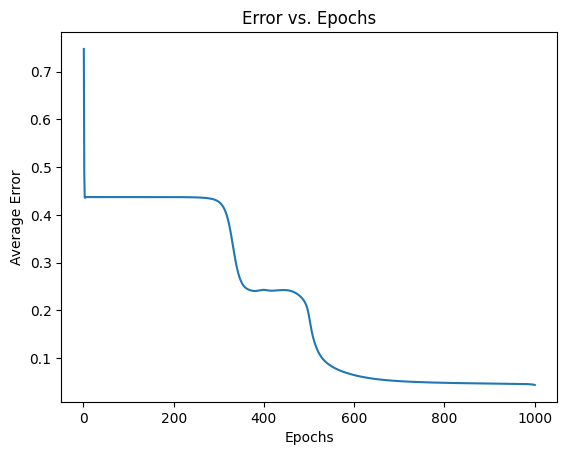

In [ ]:
# Plot error vs. epochs
# Plot the error values
plt.plot(range(1, len(error_values) + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.title('Error vs. Epochs')
plt.show()

In [ ]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

In [ ]:
for row in dataset:
 prediction = predict(network, row)
 print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0

In [ ]:
for row in digit_patterns:
 pred = predict(network, row)
 print('Expected=%d, Got=%d' % (row[-1], pred))

Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


In [ ]:
y_pred = []
y = []

for row in dataset:
 prediction = predict(network, row)
 y_pred.append(prediction)
 y.append(row[-1])
 print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0

In [ ]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) #accuracy = (number of correct predictions) / (total number of predictions)
    precision = precision_score(y_true, y_pred) #precision = (true positives) / (true positives + false positives)
    recall = recall_score(y_true, y_pred) #recall = (true positives) / (true positives + false negatives)
    f1 = f1_score(y_true, y_pred) #F1 Score = 2 * (precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1



In [ ]:
print(calculate_metrics(y, y_pred))

(0.9662921348314607, 0.9090909090909091, 1.0, 0.9523809523809523)


In [ ]:
M = []

In [ ]:
print(M)

[]


In [ ]:
M.append([0,1,1,1,0,
          0,1,0,1,0,
          0,1,1,1,0,
          0,1,0,1,0,
          0,1,0,1,0])

M.append([0,1,1,0,0,
          0,1,0,1,0,
          0,1,1,0,0,
          0,1,0,1,0,
          0,1,1,0,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,0,0,0,
          0,1,0,0,0,
          0,1,1,1,0])

M.append([0,1,1,0,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,1,0,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,1,1,0,
          0,1,0,0,0,
          0,1,1,1,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,1,1,0,
          0,1,0,0,0,
          0,1,0,0,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,0,1,1,
          0,1,0,1,0,
          0,1,1,1,0])

M.append([0,1,0,1,0,
          0,1,0,1,0,
          0,1,1,1,0,
          0,1,0,1,0,
          0,1,0,1,0])

M.append([0,1,1,1,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,1,1,1,0])

M.append([0,1,1,1,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,1,1,0,0])

M.append([0,1,0,1,0,
          0,1,1,0,0,
          0,1,0,0,0,
          0,1,1,0,0,
          0,1,0,1,0])

M.append([0,1,0,0,0,
          0,1,0,0,0,
          0,1,0,0,0,
          0,1,0,0,0,
          0,1,1,1,0])

M.append([1,0,0,0,1,
          1,1,0,1,1,
          1,0,1,0,1,
          1,0,0,0,1,
          1,0,0,0,1])

M.append([1,0,0,0,1,
          1,1,0,0,1,
          1,0,1,0,1,
          1,0,0,1,1,
          1,0,0,0,1])

M.append([0,0,1,0,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,0,1,0,0])

M.append([0,1,1,1,0,
          0,1,0,1,0,
          0,1,1,1,0,
          0,1,0,0,0,
          0,1,0,0,0])

M.append([0,0,1,0,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,0,1,0,1])

M.append([0,1,1,1,0,
          0,1,0,1,0,
          0,1,1,1,0,
          0,1,1,0,0,
          0,1,0,1,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,1,1,0,
          0,0,0,1,0,
          0,1,1,1,0])

M.append([0,1,1,1,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0])

M.append([0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,1,1,0])

M.append([0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,0,1,0,0])

M.append([1,0,0,0,1,
          1,0,0,0,1,
          1,0,1,0,1,
          1,1,0,1,1,
          1,0,0,0,1])

M.append([1,0,0,0,1,
          0,1,0,1,0,
          0,0,1,0,0,
          0,1,0,1,0,
          1,0,0,0,1])

M.append([0,1,0,1,0,
          0,1,0,1,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0])

M.append([1,1,1,1,1,
          0,0,0,1,0,
          0,0,1,0,0,
          0,1,0,0,0,
          1,1,1,1,1])

In [ ]:
print(M)

[[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]

In [ ]:
import random

# Function to generate a random 5x5 pattern and flatten it
def generate_random_flattened_pattern():
    pattern = [random.choice([0, 1]) for _ in range(25)]
    return pattern

# Number of random patterns you want to generate
num_patterns = 26

# List to store the random flattened patterns
random_patterns = []

# Generate and store random flattened patterns
for _ in range(num_patterns):
    pattern = generate_random_flattened_pattern()
    random_patterns.append(pattern)

# Append the random patterns to M
M.extend(random_patterns)

# Now M contains the original patterns followed by the randomly generated flattened patterns

# Print the updated M
for i, pattern in enumerate(M, 1):
    print(f"Pattern {i}:")
    for j in range(5):
        print(" ".join(map(str, pattern[j * 5 : (j + 1) * 5])))
    print("\n")


Pattern 1:
0 1 1 1 0
0 1 0 1 0
0 1 1 1 0
0 1 0 1 0
0 1 0 1 0


Pattern 2:
0 1 1 0 0
0 1 0 1 0
0 1 1 0 0
0 1 0 1 0
0 1 1 0 0


Pattern 3:
0 1 1 1 0
0 1 0 0 0
0 1 0 0 0
0 1 0 0 0
0 1 1 1 0


Pattern 4:
0 1 1 0 0
0 1 0 1 0
0 1 0 1 0
0 1 0 1 0
0 1 1 0 0


Pattern 5:
0 1 1 1 0
0 1 0 0 0
0 1 1 1 0
0 1 0 0 0
0 1 1 1 0


Pattern 6:
0 1 1 1 0
0 1 0 0 0
0 1 1 1 0
0 1 0 0 0
0 1 0 0 0


Pattern 7:
0 1 1 1 0
0 1 0 0 0
0 1 0 1 1
0 1 0 1 0
0 1 1 1 0


Pattern 8:
0 1 0 1 0
0 1 0 1 0
0 1 1 1 0
0 1 0 1 0
0 1 0 1 0


Pattern 9:
0 1 1 1 0
0 0 1 0 0
0 0 1 0 0
0 0 1 0 0
0 1 1 1 0


Pattern 10:
0 1 1 1 0
0 0 1 0 0
0 0 1 0 0
0 0 1 0 0
0 1 1 0 0


Pattern 11:
0 1 0 1 0
0 1 1 0 0
0 1 0 0 0
0 1 1 0 0
0 1 0 1 0


Pattern 12:
0 1 0 0 0
0 1 0 0 0
0 1 0 0 0
0 1 0 0 0
0 1 1 1 0


Pattern 13:
1 0 0 0 1
1 1 0 1 1
1 0 1 0 1
1 0 0 0 1
1 0 0 0 1


Pattern 14:
1 0 0 0 1
1 1 0 0 1
1 0 1 0 1
1 0 0 1 1
1 0 0 0 1


Pattern 15:
0 0 1 0 0
0 1 0 1 0
0 1 0 1 0
0 1 0 1 0
0 0 1 0 0


Pattern 16:
0 1 1 1 0
0 1 0 1 0
0 1 1 1 0
0 1 0 0

In [ ]:
    print(M)

[[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]

In [ ]:
labels = [1] * 26 + [0] * 26

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
dataset1 = [[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1 , 1 ],
[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1 , 1 ],
[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1 , 1 ],
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1 , 1 ],
[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1 , 1 ],
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1 , 1 ],
[1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1 , 1 ],
[1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1 , 1 ],
[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1 , 1 ],
[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1 , 1 ],
[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1 , 1 ],
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1 , 1 ],
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1 , 1 ],
[1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1 , 1 ],
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1 , 1 ],
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1 , 1 ],
[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1 , 1 ],
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0 , 0 ],
[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0 , 0 ],
[0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0 , 0 ],
[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0 , 0 ],
[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0 , 0 ],
[1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0 , 0 ],
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0 , 0 ],
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0 , 0 ],
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0 , 0 ],
[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0 , 0 ],
[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0 , 0 ],
[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0 , 0 ],
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0 , 0 ],
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0 , 0 ],
[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0 , 0 ],
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0 , 0 ],
[0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0 , 0 ],
[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0 , 0 ],
[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0 , 0 ],
[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0 , 0 ],
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0 , 0 ],
[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0 , 0 ],
[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0 , 0 ],
[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0 , 0 ],
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0 , 0 ],
[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0 , 0 ]]

In [ ]:
from random import random  # Import the random function from the random module

# Define the initialize_network function
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights': [random() for _ in range(n_inputs + 1)]} for _ in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights': [random() for _ in range(n_hidden + 1)]} for _ in range(n_outputs)]
    network.append(output_layer)
    return network

# Test training backprop algorithm
seed(1)
n_inputs = len(dataset1[0]) - 1
n_outputs = len(set([row[-1] for row in dataset1]))
network1 = initialize_network(n_inputs, 2, n_outputs)
train_network(network1, dataset1, 0.05, 1000, n_outputs)
for layer in network1:
	print(layer)

>epoch=0, lrate=0.050, error=0.629
>epoch=1, lrate=0.050, error=0.570
>epoch=2, lrate=0.050, error=0.531
>epoch=3, lrate=0.050, error=0.511
>epoch=4, lrate=0.050, error=0.504
>epoch=5, lrate=0.050, error=0.502
>epoch=6, lrate=0.050, error=0.501
>epoch=7, lrate=0.050, error=0.501
>epoch=8, lrate=0.050, error=0.502
>epoch=9, lrate=0.050, error=0.502
>epoch=10, lrate=0.050, error=0.502
>epoch=11, lrate=0.050, error=0.502
>epoch=12, lrate=0.050, error=0.502
>epoch=13, lrate=0.050, error=0.502
>epoch=14, lrate=0.050, error=0.502
>epoch=15, lrate=0.050, error=0.502
>epoch=16, lrate=0.050, error=0.502
>epoch=17, lrate=0.050, error=0.502
>epoch=18, lrate=0.050, error=0.502
>epoch=19, lrate=0.050, error=0.502
>epoch=20, lrate=0.050, error=0.502
>epoch=21, lrate=0.050, error=0.502
>epoch=22, lrate=0.050, error=0.502
>epoch=23, lrate=0.050, error=0.502
>epoch=24, lrate=0.050, error=0.502
>epoch=25, lrate=0.050, error=0.502
>epoch=26, lrate=0.050, error=0.502
>epoch=27, lrate=0.050, error=0.502
>e

In [ ]:
y_pred1 = []
y1 = []

for row in dataset1:
 prediction = predict(network1, row)
 y_pred1.append(prediction)
 y1.append(row[-1])
 print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0


In [ ]:
print(calculate_metrics(y1, y_pred1))

(1.0, 1.0, 1.0, 1.0)


In [ ]:
import random

# Function to generate a random 5x5 pattern and flatten it
def generate_random_flattened_pattern():
    pattern = [random.choice([0, 1]) for _ in range(25)] + [0]
    return pattern

# Number of random patterns you want to generate
num_patterns = 26

# List to store the random flattened patterns
random_patterns = []

# Generate and store random flattened patterns
for _ in range(num_patterns):
    pattern = generate_random_flattened_pattern()
    random_patterns.append(pattern)

print(random_patterns)


[[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [ ]:
test_pred1 = []
test1 = []

for row in random_patterns:
 prediction = predict(network1, row)
 test_pred1.append(prediction)
 test1.append(row[-1])
 print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0


In [ ]:
print(calculate_metrics(test1, test_pred1))

(0.9615384615384616, 0.0, 0.0, 0.0)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
